In [16]:
# if a module import does not work, use below
%pip install requests
%pip install pandas
%pip install matplotlib
%pip install openpyxl
%pip install scipy
%pip install numpy
%pip install google-cloud
%pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


# CSE587 Project

Saagnik Sarbadhikari, 50592327

Marcus Hartman, 50398874

Bharath Reddy, 50563984

# Forecasting the Rental Housing Economy of Various Areas Using Machine Learning

Data Retrieval

In [4]:
import json
import requests
import pandas
from scipy import stats
import numpy as np

In [5]:

#Saagnik
import requests
import pandas as pd
import json

# huduser.gov
huduser_key = open('tokens/huduser').readline()

# HUD API requests for New York State (NY)
huduser_NY = requests.get("https://www.huduser.gov/hudapi/public/fmr/statedata/NY", headers={"Authorization": f"Bearer {huduser_key}"}).json()
#HUD api request for Washington state(WA)
huduser_WA = requests.get("https://www.huduser.gov/hudapi/public/fmr/statedata/WA", headers={"Authorization": f"Bearer {huduser_key}"}).json()


# zillow.com
zillow_rentals = pd.read_csv("https://files.zillowstatic.com/research/public_csvs/zori/Metro_zori_uc_sfrcondomfr_sm_month.csv?t=1728278819")
# Home values forecasts
zillow_forecasts = pd.read_csv("https://files.zillowstatic.com/research/public_csvs/zhvf_growth/Metro_zhvf_growth_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv?t=1728278819")

# rentcast.io
rentcast_key = open('tokens/Saag_api').readline()

# Uncomment the following lines if you want to make fresh API calls (this counts towards the API limit)
# rentcast_NYC = requests.get("https://api.rentcast.io/v1/listings/rental/long-term?city=New%20York%20City&state=NY", headers={"accept": "application/json", "X-Api-Key": rentcast_key})
# f = open("results/rentcast_NYC", "w")
# f.write(json.dumps(rentcast_NYC.json()))
# f.close()

# rentcast_Seattle = requests.get("https://api.rentcast.io/v1/listings/rental/long-term?city=Seattle&state=WA", headers={"accept": "application/json", "X-Api-Key": rentcast_key})
# f = open("results/rentcast_Seattle", "w")
# f.write(json.dumps(rentcast_Seattle.json()))
# f.close()

# Load data stored from API calls
rentcast_NYC_json = json.loads(open('results/rentcast_NYC').readline())
rentcast_Seattle_json = json.loads(open('results/rentcast_Seattle').readline())
 
# airbnb

airbnb_NYC_data = pd.read_csv("https://data.insideairbnb.com/united-states/ny/new-york-city/2024-09-04/visualisations/listings.csv")
airbnb_Seattle_data = pd.read_csv("https://data.insideairbnb.com/united-states/wa/seattle/2024-06-24/visualisations/listings.csv")


In [6]:
# Marcus' data

# huduser.gov
huduser_key = open('tokens/huduser').readline()

huduser_MN = requests.get("https://www.huduser.gov/hudapi/public/fmr/statedata/MN", headers={"Authorization": f"Bearer {huduser_key}"}).json()

huduser_TX = requests.get("https://www.huduser.gov/hudapi/public/fmr/statedata/TX", headers={"Authorization": f"Bearer {huduser_key}"}).json()

# zillow.com
zillow_rentals = pandas.read_csv("https://files.zillowstatic.com/research/public_csvs/zori/Metro_zori_uc_sfrcondomfr_sm_month.csv?t=1728278819")
# this is home values forecasts, not rentals. but still poses significance 
zillow_forecasts = pandas.read_csv("https://files.zillowstatic.com/research/public_csvs/zhvf_growth/Metro_zhvf_growth_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv?t=1728278819")


# rentcast.io
# NOTE: any request using the API key will accumulate towards the monthly limit (31). please do not go over this

# the commented out part uses the API key you put into tokens/rentcast (req. credit card info). 
# the service is free but still requires credit card info-- if you find something better use it. update latex and make a little note next to it and we're all good
# rentcast_key = open('tokens/rentcast').readline()

# rentcast_TX = requests.get("https://api.rentcast.io/v1/listings/rental/long-term?state=TX", headers={"accept": "application/json", "X-Api-Key": rentcast_key})
# f = open("results/rentcast_TX", "w")
# f.write(json.dumps(rentcast_TX.json()))
# f.close()

# rentcast_MN = requests.get("https://api.rentcast.io/v1/listings/rental/long-term?state=MN", headers={"accept": "application/json", "X-Api-Key": rentcast_key})
# f = open("results/rentcast_MN", "w")
# f.write(json.dumps(rentcast_MN.json()))
# f.close()

# loads data stored from api calls above. costs money if we go above 31 calls / month
rentcast_TX_json = json.loads(open('results/rentcast_TX').readline())
rentcast_MN_json = json.loads(open('results/rentcast_MN').readline())

# airbnb
airbnb_TX_data = pandas.read_csv("https://data.insideairbnb.com/united-states/tx/dallas/2024-08-17/visualisations/listings.csv")
airbnb_MN_data = pandas.read_csv("https://data.insideairbnb.com/united-states/mn/twin-cities-msa/2024-06-24/visualisations/listings.csv")

In [7]:
# Bharaths data
import requests
import pandas as pd
import json

# huduser.gov
huduser_key = open('tokens/huduser').readline()

huduser_IA = requests.get("https://www.huduser.gov/hudapi/public/fmr/statedata/IA", headers={"Authorization": f"Bearer {huduser_key}"}).json()
huduser_CA = requests.get("https://www.huduser.gov/hudapi/public/fmr/statedata/CA", headers={"Authorization": f"Bearer {huduser_key}"}).json()

# zillow.com
zillow_rentals = pd.read_csv("https://files.zillowstatic.com/research/public_csvs/zori/Metro_zori_uc_sfrcondomfr_sm_month.csv?t=1728278819")
zillow_forecasts = pd.read_csv("https://files.zillowstatic.com/research/public_csvs/zhvf_growth/Metro_zhvf_growth_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv?t=1728278819")

# # rentcast.io
# rentcast_key = open('tokens/rentcast').readline()

# rentcast_CA = requests.get("https://api.rentcast.io/v1/listings/rental/long-term?state=CA", headers={"accept": "application/json", "X-Api-Key": rentcast_key})
# with open("results/rentcast_CA", "w") as f:
#     f.write(json.dumps(rentcast_CA.json()))

# rentcast_IA = requests.get("https://api.rentcast.io/v1/listings/rental/long-term?state=IA", headers={"accept": "application/json", "X-Api-Key": rentcast_key})
# with open("results/rentcast_IA", "w") as f:
#     f.write(json.dumps(rentcast_IA.json()))

# Load Rentcast data from saved files
rentcast_CA_json = json.loads(open('results/rentcast_CA').readline())
rentcast_IA_json = json.loads(open('results/rentcast_IA').readline())

# airbnb (Corrected URLs)
# airbnb data for California and Iowa
airbnb_CA_data = pd.read_csv("https://data.insideairbnb.com/united-states/ca/los-angeles/2024-09-04/visualisations/listings.csv")
airbnb_IA_data = pd.read_csv("https://data.insideairbnb.com/united-states/ny/rochester/2024-08-22/visualisations/listings.csv")



Data Cleaning

In [8]:
# need 10 different cleaning operations for all of our sources

# 1. cleaning hudusers.gov of unnecessary columns
def cleanCounties(countyInfo):
    columnsToDrop = ['town_name', 'metro_name', 'fips_code', 'FMR Percentile', 'metro_name', 'statename', 'statecode', 'smallarea_status']
    
    for county in countyInfo:
        for n in columnsToDrop:
            if n in county:
                county.pop(n)
        
    return countyInfo


countyInfo_MN = cleanCounties(huduser_MN['data']['counties'])
countyInfo_TX = cleanCounties(huduser_MN['data']['counties'])

#2. Zillow rentals: drop unnecessary columns
zillow_rentals.drop(["RegionID", "SizeRank", "RegionType"], axis=1, inplace=True, errors='ignore')

#3. Zillow rentals: drop all that aren't for MN, TX
zillowRentals_MN = zillow_rentals.query('RegionName.str.contains("MN")')
zillowRentals_TX = zillow_rentals.query('RegionName.str.contains("TX")')

#4. Zillow forecasts: drop unnecessary columns
zillow_forecasts.drop(["RegionID", "SizeRank", "RegionType", "BaseDate"], axis=1, inplace=True, errors='ignore')

#5. Zillow forecasts: drop all that aren't for MN, TX
zillowForecasts_MN = zillow_forecasts.query('StateName == "MN"')
zillowForecasts_TX = zillow_forecasts.query('StateName == "TX"')

#6. rentCast: drop unnecessary columns
def cleanRentals(rentalInfo):
    columnsToDrop = ['id', 'formattedAddress', 'addressLine1', 'addressLine2', 'latitude', 'longitude', 'status', 'listingType', 'listedDate', 'removedDate', 'createdDate', 'lastSeenDate', 'daysOnMarket', 'yearBuilt', 'history']
    
    for rental in rentalInfo:
        for c in columnsToDrop:
            if c in rental:
                rental.pop(c)

try:
    cleanRentals(rentcast_MN_json)
    cleanRentals(rentcast_TX_json)
except TypeError: # cell already ran
    pass

#7. rentCast: sort data by county, store in dictionary for easier lookup
def convertToDict(rentalInfo):
    res = dict()
    for rental in rentalInfo:
        county = rental['county']
        if county not in res:
            res[county] = []
        res[county].append(rental)
    return res

# only found in Hennepin, but lots to work with
rentcast_MN = convertToDict(rentcast_MN_json)
# only found in Dallas, but lots to work with
rentcast_TX = convertToDict(rentcast_TX_json)

#8. airbnb: get rid of unnecessary columns
airbnb_MN_data.drop(["id", "name", "host_name", "host_id", "neighbourhood_group", "latitude", "longitude", "last_review", "reviews_per_month", "number_of_reviews_ltm", "license"], axis=1, inplace=True, errors='ignore')
airbnb_TX_data.drop(["id", "name", "host_name", "host_id", "neighbourhood_group", "latitude", "longitude", "last_review", "reviews_per_month", "number_of_reviews_ltm", "license"], axis=1, inplace=True, errors='ignore')

#9. airbnb: get rid of duplicates
airbnb_MN_data.drop_duplicates()
airbnb_TX_data.drop_duplicates()

#9. airbnb: get rid of rows where price is not available
airbnb_MN_data.dropna(subset=['price'], how='all', inplace=True)
airbnb_TX_data.dropna(subset=['price'], how='all', inplace=True)

#10. airbnb: sort by room_type, convert to dictionary
def convertToDict_BNB(df : pandas.DataFrame):
    res = dict()
    for _, row in df.iterrows():
        roomType = row['room_type']
        if roomType not in res:
            res[roomType] = []
        res[roomType].append(row)
    return res
    
airbnb_MN = convertToDict_BNB(airbnb_MN_data)
airbnb_TX = convertToDict_BNB(airbnb_TX_data)

EDA

C:\Users\into4\AppData\Local\Temp\ipykernel_19324\615339631.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop.rename(columns={'name': 'county_name', 'pop2024': 'Population'}, inplace=True)


<Axes: title={'center': "Counties' Efficiency of Rent versus Population, 2024"}, xlabel='Efficiency', ylabel='Population'>

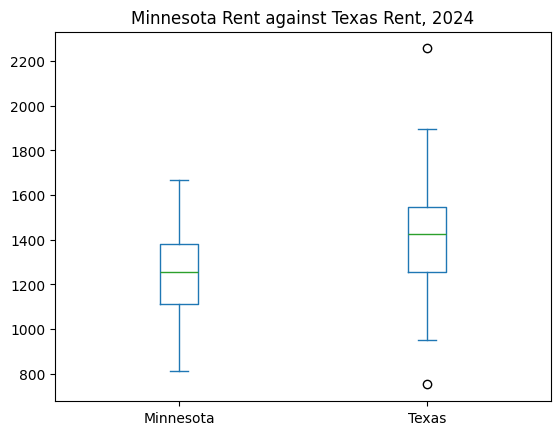

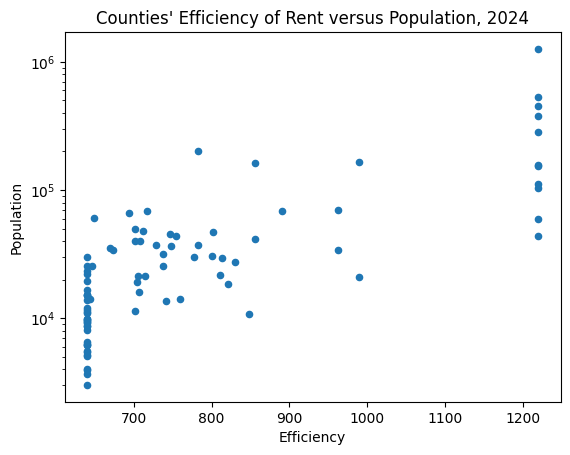

In [9]:
# marcus

# 1. Out of the two states I have chosen, if I am looking at the data of Texas compared to Minnesota, I will see a higher mean and more variation of rent because Texas is more economically active than the other.

# zillowrentals_MN contains historic data of all cities in the associated state
MN_current = zillowRentals_MN['2024-08-31']
TX_current = zillowRentals_TX['2024-08-31']

# combine then plot. boxplot will show all the descriptors we need
pandas.DataFrame({"Minnesota" : MN_current, "Texas" : TX_current}).plot(kind='box', title="Minnesota Rent against Texas Rent, 2024")

# in terms of the hypothesis, this is proven true. 
# the average of TX rent is much higher than the MN rent, as expected. The variation of rent can be shown by looking at the differences between IQ1 and IQ3, which are much farther apart in TX than MN. 

# 2. If Minnesota’s major cities have high rent, then there will be much lower rent outside of these cities because there is a lower standard of living comparatively.

# the best source for this will be huduser for county rent efficiency 
# get demographics by county (another data source, specific to the problem)
demographics_MN = pandas.read_csv('data/Demographics_MN.csv')
pop = demographics_MN.get(['pop2024', 'name'])
pop.rename(columns={'name': 'county_name', 'pop2024': 'Population'}, inplace=True)

# get counties into dataframe
counties_MN = pandas.DataFrame(pandas.json_normalize(countyInfo_MN))
counties_MN = counties_MN.merge(pop, on='county_name') # merge the demographics and county info

# plot in scatterplot: (Efficiency, Population)
counties_MN.get(['county_name', "Efficiency", "Population"]).plot(kind='scatter', x='Efficiency', y="Population", logy=True, title="Counties' Efficiency of Rent versus Population, 2024")


In [10]:
#saagnik data cleaning
# need 10 different cleaning operations for all of our sources

# 1. cleaning hudusers.gov of unnecessary columns
import pandas
def cleanCounties(countyInfo):
    columnsToDrop = ['town_name', 'metro_name', 'fips_code', 'FMR Percentile', 'metro_name', 'statename', 'statecode', 'smallarea_status']
    
    for county in countyInfo:
        for n in columnsToDrop:
            if n in county:
                county.pop(n)
        
    return countyInfo


countyInfo_NYC = cleanCounties(huduser_NY['data']['counties'])
countyInfo_Seattle = cleanCounties(huduser_WA['data']['counties'])

#2. Zillow rentals: drop unnecessary columns
zillow_rentals.drop(["RegionID", "SizeRank", "RegionType"], axis=1, inplace=True, errors='ignore')

#3. Zillow rentals: drop all that aren't for MN, TX
zillowRentals_NY = zillow_rentals.query('RegionName.str.contains("NY")')
zillowRentals_WA = zillow_rentals.query('RegionName.str.contains("WA")')

#4. Zillow forecasts: drop unnecessary columns
zillow_forecasts.drop(["RegionID", "SizeRank", "RegionType", "BaseDate"], axis=1, inplace=True, errors='ignore')

#5. Zillow forecasts: drop all that aren't for MN, TX
zillowForecasts_NY = zillow_forecasts.query('StateName == "NY"')
zillowForecasts_WA = zillow_forecasts.query('StateName == "WA"')

#6. rentCast: drop unnecessary columns
def cleanRentals(rentalInfo):
    columnsToDrop = ['id', 'formattedAddress', 'addressLine1', 'addressLine2', 'latitude', 'longitude', 'status', 'listingType', 'listedDate', 'removedDate', 'createdDate', 'lastSeenDate', 'daysOnMarket', 'yearBuilt', 'history']
    
    for rental in rentalInfo:
        for c in columnsToDrop:
            if c in rental:
                rental.pop(c)

try:
    cleanRentals(rentcast_NYC_json)
    cleanRentals(rentcast_Seattle_json)
except TypeError: # cell already ran
    pass

#7. rentCast: sort data by county, store in dictionary for easier lookup
def convertToDict(rentalInfo):
    res = dict()
    for rental in rentalInfo:
        county = rental['county']
        if county not in res:
            res[county] = []
        res[county].append(rental)
    return res

# only found in NYC, but lots to work with
rentcast_NYC = convertToDict(rentcast_NYC_json)
# only found in seattle, but lots to work with
rentcast_Seattle = convertToDict(rentcast_Seattle_json)

#8. airbnb: get rid of unnecessary columns
airbnb_NYC_data.drop(["id", "name", "host_name", "host_id", "neighbourhood_group", "latitude", "longitude", "last_review", "reviews_per_month", "number_of_reviews_ltm", "license"], axis=1, inplace=True, errors='ignore')
airbnb_Seattle_data.drop(["id", "name", "host_name", "host_id", "neighbourhood_group", "latitude", "longitude", "last_review", "reviews_per_month", "number_of_reviews_ltm", "license"], axis=1, inplace=True, errors='ignore')

#9. airbnb: get rid of duplicates
airbnb_NYC_data.drop_duplicates()
airbnb_Seattle_data.drop_duplicates()

#9. airbnb: get rid of rows where price is not available
airbnb_NYC_data.dropna(subset=['price'], how='all', inplace=True)
airbnb_Seattle_data.dropna(subset=['price'], how='all', inplace=True)

#10. airbnb: sort by room_type, convert to dictionary
def convertToDict_BNB(df : pandas.DataFrame):
    res = dict()
    for _, row in df.iterrows():
        roomType = row['room_type']
        if roomType not in res:
            res[roomType] = []
        res[roomType].append(row)
    return res
    
airbnb_NYC = convertToDict_BNB(airbnb_NYC_data)
airbnb_Seattle = convertToDict_BNB(airbnb_Seattle_data)



<Figure size 1000x600 with 0 Axes>

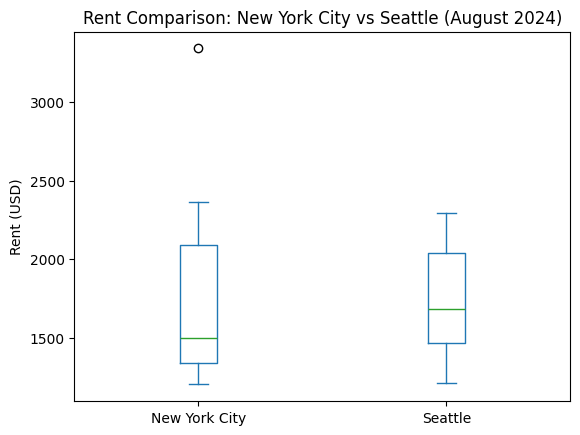

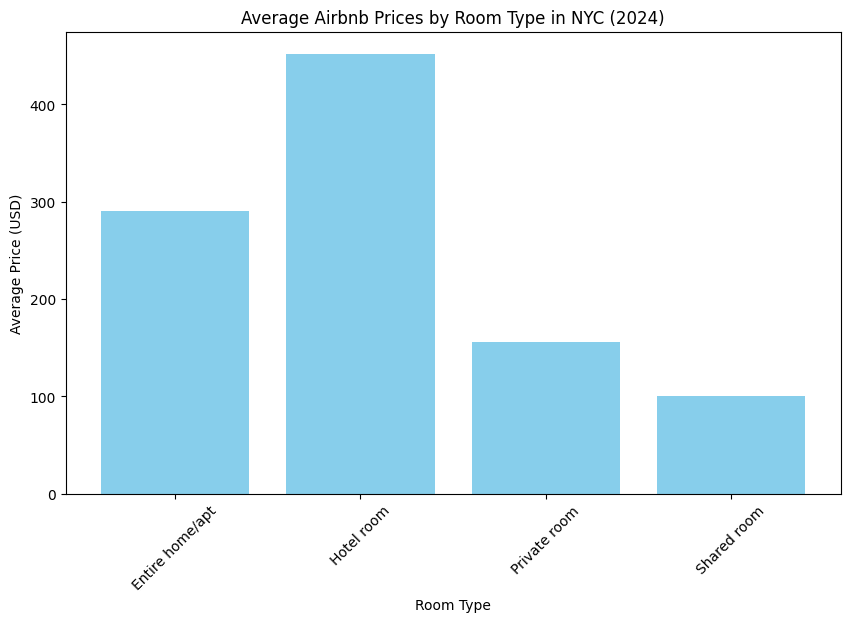

In [11]:
#saag EDA
import pandas as pd
import matplotlib.pyplot as plt  # Importing matplotlib.pyplot
import matplotlib 
# EDA Question 1: Rent Comparison between NYC and Seattle

# Extracting the most recent rent data from Zillow rentals
nyc_rent = zillowRentals_NY['2024-08-31']
seattle_rent = zillowRentals_WA['2024-08-31']

# Create a DataFrame for rent comparison
rent_data = pd.DataFrame({
    "New York City": nyc_rent,
    "Seattle": seattle_rent
})

# Plotting boxplot for rent comparison
plt.figure(figsize=(10, 6))
rent_data.plot(kind='box', title="Rent Comparison: New York City vs Seattle (August 2024)", ylabel="Rent (USD)")
plt.show()

# Analyze the plot
# The boxplot will show the median rent, interquartile range, and any outliers
# EDA Question 2: Airbnb Listings Price vs. Room Type in New York City

# Grouping by room_type and calculating the mean price
airbnb_nyc_prices = airbnb_NYC_data.groupby('room_type')['price'].mean().reset_index()

# Plotting bar chart for average price by room type
plt.figure(figsize=(10, 6))
plt.bar(airbnb_nyc_prices['room_type'], airbnb_nyc_prices['price'], color='skyblue')
plt.title("Average Airbnb Prices by Room Type in NYC (2024)")
plt.xlabel("Room Type")
plt.ylabel("Average Price (USD)")
plt.xticks(rotation=45)
plt.show()

# Analyze the plot
# This bar chart will reveal which room types are most expensive on Airbnb


In [12]:
#bharath data cleaning 
# need 10 different cleaning operations for all of our sources

# 1. cleaning hudusers.gov of unnecessary columns
def cleanCounties(countyInfo):
    columnsToDrop = ['town_name', 'metro_name', 'fips_code', 'FMR Percentile', 'metro_name', 'statename', 'statecode', 'smallarea_status']
    
    for county in countyInfo:
        for n in columnsToDrop:
            if n in county:
                county.pop(n)
        
    return countyInfo

# Cleaning county data for CA and IA
countyInfo_CA = cleanCounties(huduser_CA['data']['counties'])
countyInfo_IA = cleanCounties(huduser_IA['data']['counties'])

# 2. Zillow rentals: drop unnecessary columns
zillow_rentals.drop(["RegionID", "SizeRank", "RegionType"], axis=1, inplace=True, errors='ignore')

# 3. Zillow rentals: drop all that aren't for Los Angeles (CA) and Rochester (IA)
zillowRentals_LA = zillow_rentals.query('RegionName.str.contains("Los Angeles")')
zillowRentals_Rochester = zillow_rentals.query('RegionName.str.contains("Rochester")')

# 4. Zillow forecasts: drop unnecessary columns
zillow_forecasts.drop(["RegionID", "SizeRank", "RegionType", "BaseDate"], axis=1, inplace=True, errors='ignore')

# 5. Zillow forecasts: drop all that aren't for CA and IA
zillowForecasts_CA = zillow_forecasts.query('StateName == "CA"')
zillowForecasts_IA = zillow_forecasts.query('StateName == "IA"')

# 6. rentCast: drop unnecessary columns
def cleanRentals(rentalInfo):
    columnsToDrop = ['id', 'formattedAddress', 'addressLine1', 'addressLine2', 'latitude', 'longitude', 
                     'status', 'listingType', 'listedDate', 'removedDate', 'createdDate', 
                     'lastSeenDate', 'daysOnMarket', 'yearBuilt', 'history']
    
    for rental in rentalInfo:
        for c in columnsToDrop:
            if c in rental:
                rental.pop(c)

try:
    cleanRentals(rentcast_CA_json)
    cleanRentals(rentcast_IA_json)
except TypeError: # cell already ran
    pass

# 7. rentCast: sort data by county, store in dictionary for easier lookup
def convertToDict(rentalInfo):
    res = dict()
    for rental in rentalInfo:
        county = rental['county']
        if county not in res:
            res[county] = []
        res[county].append(rental)
    return res

# Sorting rentcast data by county for CA and IA
rentcast_CA = convertToDict(rentcast_CA_json)
rentcast_IA = convertToDict(rentcast_IA_json)

# 8. airbnb: get rid of unnecessary columns
airbnb_CA_data.drop(["id", "name", "host_name", "host_id", "neighbourhood_group", 
                     "latitude", "longitude", "last_review", "reviews_per_month", 
                     "number_of_reviews_ltm", "license"], axis=1, inplace=True, errors='ignore')

airbnb_IA_data.drop(["id", "name", "host_name", "host_id", "neighbourhood_group", 
                     "latitude", "longitude", "last_review", "reviews_per_month", 
                     "number_of_reviews_ltm", "license"], axis=1, inplace=True, errors='ignore')

# 9. airbnb: get rid of duplicates
airbnb_CA_data.drop_duplicates()
airbnb_IA_data.drop_duplicates()

# 9. airbnb: get rid of rows where price is not available
airbnb_CA_data.dropna(subset=['price'], how='all', inplace=True)
airbnb_IA_data.dropna(subset=['price'], how='all', inplace=True)

# 10. airbnb: sort by room_type, convert to dictionary
def convertToDict_BNB(df: pd.DataFrame):
    res = dict()
    for _, row in df.iterrows():
        roomType = row['room_type']
        if roomType not in res:
            res[roomType] = []
        res[roomType].append(row)
    return res

# Sorting airbnb data by room type for CA and IA
airbnb_CA = convertToDict_BNB(airbnb_CA_data)
airbnb_IA = convertToDict_BNB(airbnb_IA_data)
print("Columns in airbnb_CA_data:", airbnb_CA_data.columns.tolist())
print("Columns in airbnb_IA_data:", airbnb_IA_data.columns.tolist())


Columns in airbnb_CA_data: ['neighbourhood', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']
Columns in airbnb_IA_data: ['neighbourhood', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']


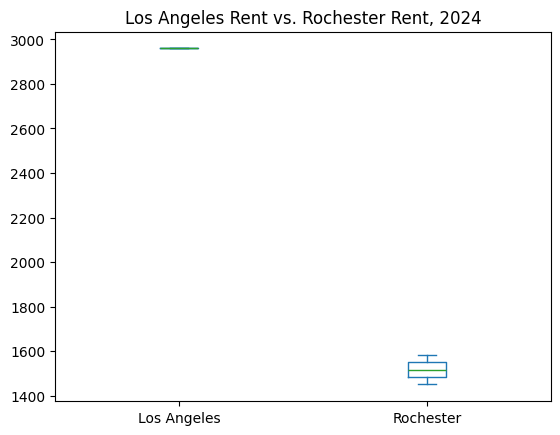

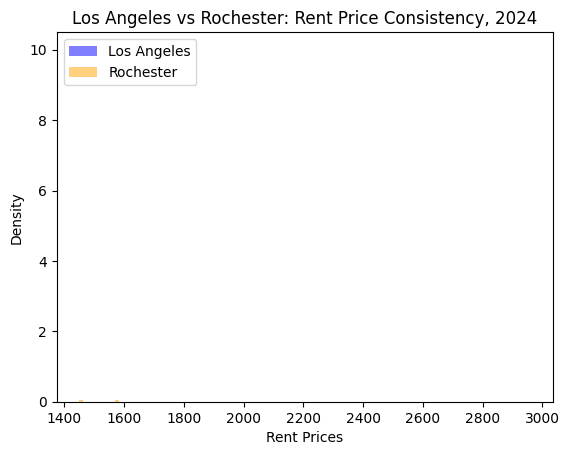

In [13]:
#bharath 

import pandas as pd
import matplotlib.pyplot as plt

# Assuming Zillow rental data is already filtered for Los Angeles and Rochester
# zillowRentals_LA and zillowRentals_Rochester are already available after cleaning

# 1. Comparing the mean and variation of rent between Los Angeles and Rochester.

# Use Zillow rental data filtered for Los Angeles and Rochester
LA_current = zillowRentals_LA['2024-08-31']  # Data for August 2024 for Los Angeles
Rochester_current = zillowRentals_Rochester['2024-08-31']  # Data for August 2024 for Rochester

# Combine and plot boxplot to show rent distribution
pd.DataFrame({"Los Angeles": LA_current, "Rochester": Rochester_current}).plot(kind='box', title="Los Angeles Rent vs. Rochester Rent, 2024")

# Show the plot
plt.show()

# Interpretation of results:
# This boxplot will show if the mean rent in Los Angeles is significantly higher and if the variation (distance between Q1 and Q3) is greater compared to Rochester.


# 2. Comparing the consistency of rent prices between Rochester and Los Angeles

# Check if there are any missing values and handle them
LA_current = zillowRentals_LA['2024-08-31'].dropna()
Rochester_current = zillowRentals_Rochester['2024-08-31'].dropna()

# Plot histograms for both cities with more granular bins and adjusted transparency
LA_current.plot(kind='hist', alpha=0.5, label='Los Angeles', density=True, bins=10, color='blue')
Rochester_current.plot(kind='hist', alpha=0.5, label='Rochester', density=True, bins=10, color='orange')

# Adding legend and labels
plt.legend()
plt.xlabel('Rent Prices')
plt.ylabel('Density')
plt.title('Los Angeles vs Rochester: Rent Price Consistency, 2024')

# Show the plot
plt.show()

# Interpretation of results:
# By comparing the histograms, we expect to see that the rent prices in Rochester are more concentrated around the median, showing higher consistency,
# while Los Angeles will have a wider spread of prices, reflecting greater market volatility.



# Phase 2

## (Saagnik) The problems asked in Phase 1: 
### 1. Rent Comparison between NYC and Seattle
### 2. Airbnb Listings Price vs. Room Type in New York City 


In [14]:
#In question 1 I previously did the comparison of rent prices of NYC and Seattle . Now we dig deeper and use a training model SVM to fit the previous data and use it to predict the
#price trend of next 5 years from 2025-2030
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

nyc_rent = zillowRentals_NY['2024-08-31']
seattle_rent = zillowRentals_WA['2024-08-31']
nyc_rent_dates = pd.to_datetime(nyc_rent.index)
seattle_rent_dates = pd.to_datetime(seattle_rent.index)

# Checking for missing values and filling them with median values
if nyc_rent.isnull().any():
    nyc_rent.fillna(nyc_rent.median(), inplace=True)
if seattle_rent.isnull().any():
    seattle_rent.fillna(seattle_rent.median(), inplace=True)

nyc_months_since_start = (nyc_rent_dates.year - nyc_rent_dates.year.min()) * 12 + (nyc_rent_dates.month - 1)
seattle_months_since_start = (seattle_rent_dates.year - seattle_rent_dates.year.min()) * 12 + (seattle_rent_dates.month - 1)
X_nyc = nyc_months_since_start.values.reshape(-1, 1)
y_nyc = nyc_rent.values
X_seattle = seattle_months_since_start.values.reshape(-1, 1)
y_seattle = seattle_rent.values
scaler = StandardScaler()
X_nyc_scaled = scaler.fit_transform(X_nyc)
X_seattle_scaled = scaler.fit_transform(X_seattle)
svm_nyc = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svm_seattle = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svm_nyc.fit(X_nyc_scaled, y_nyc)
svm_seattle.fit(X_seattle_scaled, y_seattle)

# Generating future dates for the next 5 years (2025-2030)
future_dates = pd.date_range(start='2025-01-01', periods=60, freq='ME')
future_months_since_start = (future_dates.year - nyc_rent_dates.year.min()) * 12 + (future_dates.month - 1)
future_months_since_start = np.array(future_months_since_start).reshape(-1, 1)

# Scaling the future data for prediction
future_months_since_start_scaled = scaler.transform(future_months_since_start)
predicted_rent_nyc = svm_nyc.predict(future_months_since_start_scaled)
predicted_rent_seattle = svm_seattle.predict(future_months_since_start_scaled)

prediction_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_NYC_Rent': predicted_rent_nyc,
    'Predicted_Seattle_Rent': predicted_rent_seattle
})

# Plotting the predicted rents for the next 5 years
plt.figure(figsize=(12, 6))
plt.plot(future_dates, predicted_rent_nyc, label='Predicted NYC Rent', color='blue')
plt.plot(future_dates, predicted_rent_seattle, label='Predicted Seattle Rent', color='green')

# Adding labels and title
plt.title("Predicted Rent Prices for NYC and Seattle (Next 5 Years)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Rent (USD)", fontsize=12)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'sklearn'

In this question I used the SVM model to understand and train the model with the price trends of rent of two cities NYC and seattle and based on its understanding predict the trend of future price of rents in these 2 cities. We feed our training data model and predict the data for the next 5 years aka from 2025-2030. After training the model on historic data and fitting it we get it to predict the future data and visualise the data into a plot for a better understanding.

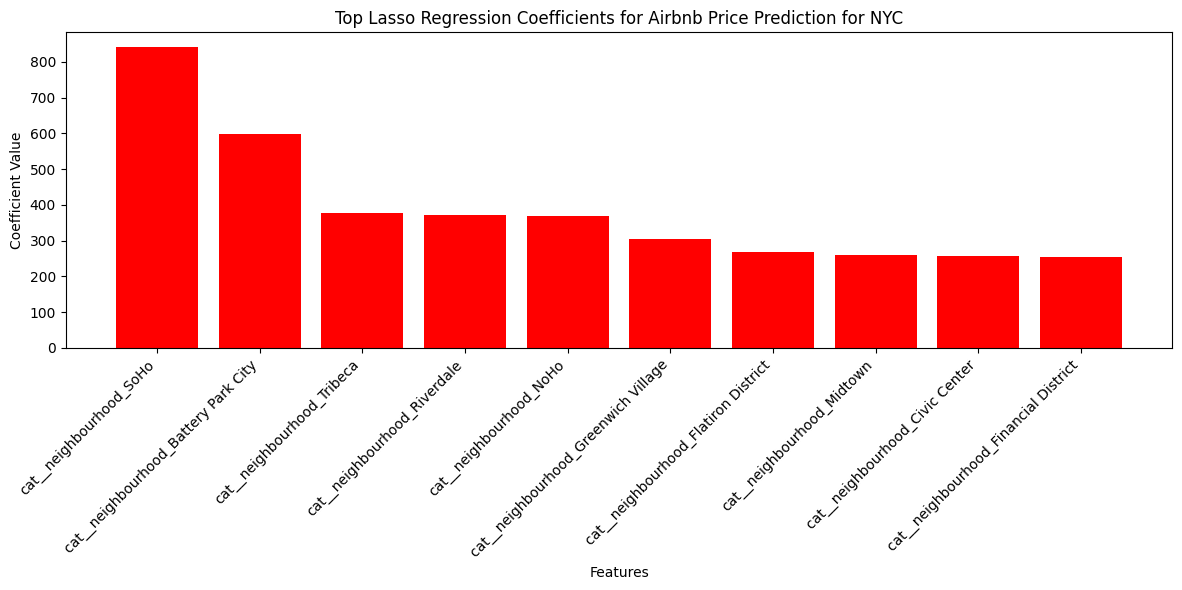

In [ ]:
#Question 2 For this I previously did the analysis for airbnb prices vs room type in NYC . Here I am gonna analyze it more to using lasso rigression and plot the coeficients
#of lasso against the features in this scenario neighbourhoods to determine the effect that has on the price of rents in
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer


X = airbnb_NYC_data[['room_type', 'neighbourhood', 'number_of_reviews']]
y = airbnb_NYC_data['price']
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), ['room_type', 'neighbourhood']),  
    ('num', StandardScaler(), ['number_of_reviews'])                                   
])
lasso = make_pipeline(preprocessor, LassoCV(cv=5, random_state=0))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lasso.fit(X_train, y_train)
feature_names = lasso.named_steps['columntransformer'].get_feature_names_out()
lasso_coef = lasso.named_steps['lassocv'].coef_

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lasso_coef})
coef_df = coef_df[coef_df['Coefficient'] != 0]
coef_df['abs_coef'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='abs_coef', ascending=False)

# Selecting the top ten features to be plotted
top_n = 10
coef_df = coef_df.head(top_n)

# Plotting the coefficients for significant features
plt.figure(figsize=(12, 6))
plt.bar(coef_df['Feature'], coef_df['Coefficient'], color='red')
plt.title("Top Lasso Regression Coefficients for Airbnb Price Prediction for NYC")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()


The above graph plots the coefficient value against the top 10 value of features which is neighbourhood in this scenario.Here we are diving deeper and seeing how the features such as neighbourhood influences the price trends of airbnb rents in NYC. The prediction is merely on the given data as processed by the lasso regression model based on the given attributes or features which was room type, no of nights, reviews compared to the target which was price.
We use the scaler method to scale the "no_of_reviews" to have a mean of 0 and a standard deviation of 1 to ensure streamlining the model performance.Then we split the data into training and testing data to check the model performance. Then we train the lasso model on the training data and after the model is fitted we extract the coefficients to analyse them and understand their impact on out target parameter aka price.
From the graph we see that more positive the coefficient more is the effect it has on the price of the room. ALso the graph shows the impact of each feature on the airbnb price.

## Question 2 - Explanation and Analysis 
Algorithms used: SVM (Q1), Lasso Regression (Q2)

The first question used SVM to find identify trends of the price of rents of two cities NYC and Seattle.We first transform the date data into numerical format as SVM needs an numerical input.Then we scale the months data as SVM is sensitive to data of bigger magnitude.Afterwards we train our model using the RBF or radical basis function and we get the data prediction of rent for next 5 years for the two cities NYC and Seattle.However I found that the answers is coming as constant for the enxt 5 years for the two cities which could be due to lack of changes in time in the training data. if the training data doesn't have sufficient temporal changes the SVM model will not be able to show a dynamic pattern.
Also sometimes the RBF kerner can oversmooth predictions too much due to underfitting or overfitting.It could also be due to scaling issues in the data which leads to smoothness in the predicted data.

In the second question I used Lasso regression model to find the effect of features such as neighbourhood, roomtype and no of reviews has on parameters such as price of a room in NYC.Here there a lot of parameters we need to work with and keep a mind of. We encode the paramters room type and neighbourhood into dummy variables suitable for regression and scale the reviews to streamline the performance of our data model.The model works really well as we can see what are the effect of the attributes on price of a room in NYC which comes up as coefficients of a lasso regression on the Y-axis.I did some changes such as filtering the coefficients that have 0 out as they didn't contribute to the model and kep the top 10 features to be plotted otherwise the X-axis was overlapped and couldn't be legible.This allowed us to have a clear visualization of the important parameters that are affecting the rent prices in NYC.


## (Marcus) The problems asked in Phase 1: 
### 1. Could there be a larger increase in the gap of rent between a high-income state and one that is lower? Could we see people move to other states to save the money, but work remotely?
### 2. As rent continues to rise, could we see a decline of single-room rent prices to combat multi-family apartments?

In [ ]:
# this data will be used by both questions. it is historic data that can look at trends within each county 
# reshape huduser data to have years 2017-2024, include year within each entry
huduser_TX = []
huduser_MN = []
for year in range(2017, 2025):
    temp_TX = requests.get(f"https://www.huduser.gov/hudapi/public/fmr/statedata/TX?year={year}", headers={"Authorization": f"Bearer {huduser_key}"}).json()["data"]["counties"]
    for x in temp_TX:
        x["year"] = year
        huduser_TX.append(x)
    
    temp_MN = requests.get(f"https://www.huduser.gov/hudapi/public/fmr/statedata/MN?year={year}", headers={"Authorization": f"Bearer {huduser_key}"}).json()["data"]["counties"]
    for x in temp_MN:
        x["year"] = year
        huduser_MN.append(x)

huduser_TX = pandas.DataFrame(huduser_TX)
huduser_MN = pandas.DataFrame(huduser_MN)

# export to google cloud
# huduser_TX.to_csv("gs://cse-587-huduser/huduser_TX.csv", index=False)
# huduser_MN.to_csv("gs://cse-587-huduser/huduser_MN.csv", index=False)

# drop unnecessary columns
huduser_TX.drop(["metro_name", "fips_code", "FMR Percentile", "town_name", "statename", "statecode", "smallarea_status"], axis=1, inplace=True, errors="ignore")
huduser_MN.drop(["metro_name", "fips_code", "FMR Percentile", "town_name", "statename", "statecode", "smallarea_status"], axis=1, inplace=True, errors="ignore")

# util
years = np.array(range(2017, 2025))
allCounties_TX = huduser_TX["county_name"].unique()

Path exists:  True


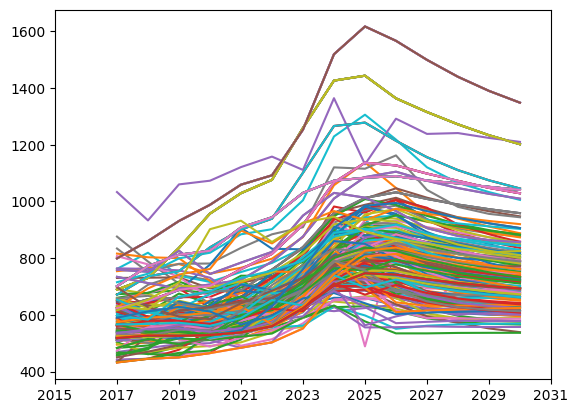

In [ ]:
# Question 1: 

# The first part of the question was answered within Phase 1 responses. The second part of this requires a little more digging into the patterns at hand, associating year-over-year rent increases along with questions regarding taxes. The quality of life is rather redundant in this question (since we're comparing the same country), but the income of the same job in two different places can prove to be tied with a greater quality of life if less is taxed, rent is cheaper, etc. 


# get rid of verbosity
import warnings
warnings.simplefilter('ignore')



# To answer this question, I use ARMA (out of class) as the basis to find an answer to this problem. This model is used in series to predict outcomes using past data to its advantage.
from statsmodels.tsa.arima.model import ARIMA
# ARMA is ARIMA without the differencing (integrated). we do not need this within the scope of the problem 


# predict the next 5 years for each county (COSTLY!)
allCounties_TX = huduser_TX["county_name"].unique()
ARIMA_data = {}
for county in allCounties_TX:
    ARIMA_data[county] = []
    for year in years:
        yearData = huduser_TX.loc[(huduser_TX["county_name"] == county) & (huduser_TX["year"] == year)]
        ARIMA_data[county].append(yearData['Efficiency'].iloc[0])
        
    # predict the next 5 years
    for year in range(2025, 2031):
        # consider the order=(autoregression, diferencing, moving average). 
        # this is where influence based on the past data comes into play. one index = one year
        # these values (1,0,2) were chosen because the market can be thought to be influenced by the past couple of years, rather than the average going extremely high within a year (stability).
        model = ARIMA(ARIMA_data[county], order=(1,0,2))
        model_fit = model.fit()
        ARIMA_data[county].append(model_fit.forecast()[0])
    
    # add each to the plot below
    plt.plot(ARIMA_data[county])

# set labels 
locs, labels = plt.xticks()
plt.xticks(locs, list(range(2015, 2033, 2)))

plt.savefig('./results/forecasts_TX.png')

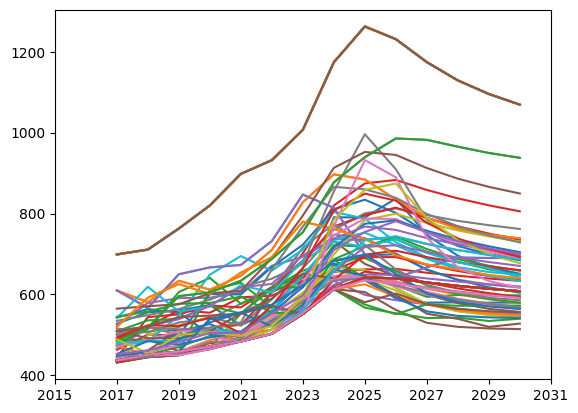

In [ ]:
# do the same for MN
allCounties_MN = huduser_MN["county_name"].unique()
ARIMA_data = {}
for county in allCounties_MN:
    ARIMA_data[county] = []
    for year in years:
        yearData = huduser_MN.loc[(huduser_MN["county_name"] == county) & (huduser_MN["year"] == year)]
        ARIMA_data[county].append(yearData['Efficiency'].iloc[0])
        
    # predict the next 5 years
    for year in range(2025, 2031):
        # consider the order=(autoregression, diferencing, moving average). 
        # this is where influence based on the past data comes into play. one index = one year
        # these values (1,0,2) were chosen because the market can be thought to be influenced by the past couple of years, rather than the average going extremely high within a year (stability).
        model = ARIMA(ARIMA_data[county], order=(1,0,2))
        model_fit = model.fit()
        ARIMA_data[county].append(model_fit.forecast()[0])
    
    # add each to the plot below
    plt.plot(ARIMA_data[county])

# set labels 
locs, labels = plt.xticks()
plt.xticks(locs, list(range(2015, 2033, 2)))

plt.savefig('./results/forecasts_MN.png')

It seems as if the same trends can be found within both MN and TX. While this can be a limitation of the model chosen, this signifies that no matter the state, the trends remain the same. Taking a closer look at 2017 to 2024, the same exact patterns can be found. The predictions are merely the model attempting to make the best-fitted guess. Limited by my scope, I can only say no to people moving states in order to save money in taxes. It seems more likely that moving to counties that are lower in rent can be beneficial in both states, signaled by the range of efficiency found in many counties. This is multiplied in Minnesota, where Hennepin County is much higher than the average due to this being where Minneapolis is located; moving farther from the city centers can be found to be more beneficial than moving to a different state entirely.

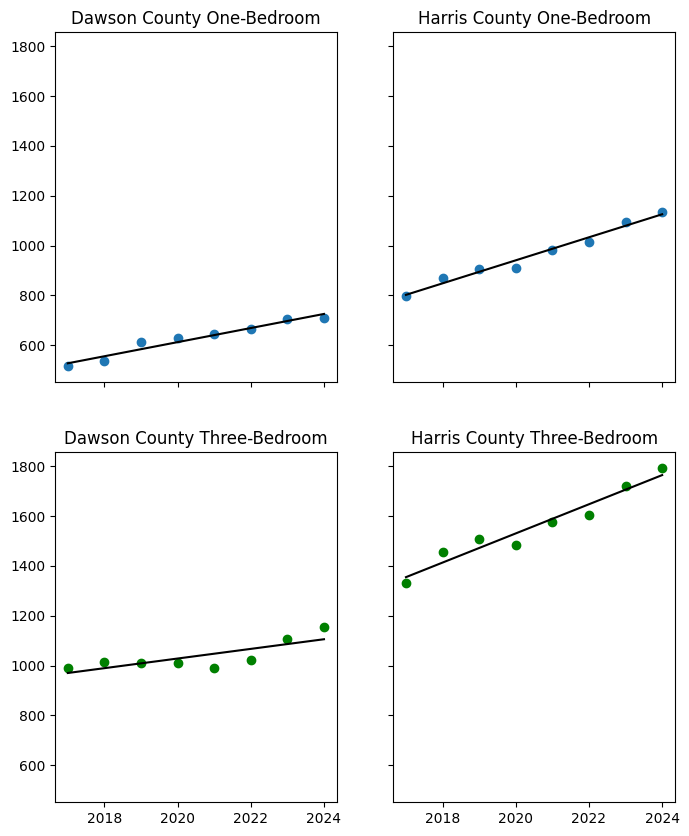

In [ ]:
# Question 2

# The approach to this problem will find the correlation between multi and single-bedroom apartments, to find a (hopefully) linear increase. Signs of this changing over the years exponentially can point to validates the question's associated hypothesis.

# To answer this question, I use linear regression (discussed in class) as the basis to find an answer to this problem.

countyRegressions = {}
for county in allCounties_TX:
    res = huduser_TX.loc[huduser_TX["county_name"] == county]
    regressions = {}
    
    columns = ["One-Bedroom", "Two-Bedroom", "Three-Bedroom", "Four-Bedroom"]
    for column in columns:
        y = res[column].to_numpy()
        slope, intercept, _r, _p, _err = stats.linregress(years, y)
        
        # map given regression line to points that can be used for graphing
        def findValue(x):
            return slope * x + intercept
        regressions[column] = list(map(findValue, years))
        
    countyRegressions[county] = regressions



"""
grader: if you want different counties, find them by population here: https://www.texas-demographics.com/counties_by_population
HIC (high population) = Harris
LIC (low population)= Liberty

    LIC SINGLE          HIC SINGLE
    LIC THREE           HIC THREE
"""
HIC_COUNTY = "Harris County"
LIC_COUNTY = "Dawson County"

hic_single = huduser_TX.loc[huduser_TX["county_name"] == HIC_COUNTY]["One-Bedroom"].to_numpy()
lic_single = huduser_TX.loc[huduser_TX["county_name"] == LIC_COUNTY]["One-Bedroom"].to_numpy()

hic_triple = huduser_TX.loc[huduser_TX["county_name"] == HIC_COUNTY]["Three-Bedroom"].to_numpy()
lic_triple = huduser_TX.loc[huduser_TX["county_name"] == LIC_COUNTY]["Three-Bedroom"].to_numpy()

fig, axs = plt.subplots(2, 2, sharey=True, sharex=True)

# Read left to right, colors associate to separate thoughts here
axs[0, 0].scatter(years, lic_single)
axs[0, 0].plot(years, countyRegressions[LIC_COUNTY]["One-Bedroom"], color="black")
axs[0, 0].set_title(f"{LIC_COUNTY} One-Bedroom")

axs[0, 1].scatter(years, hic_single)
axs[0, 1].plot(years, countyRegressions[HIC_COUNTY]["One-Bedroom"], color="black")
axs[0, 1].set_title(f"{HIC_COUNTY} One-Bedroom")

axs[1, 0].scatter(years, lic_triple, color="green")
axs[1, 0].plot(years, countyRegressions[LIC_COUNTY]["Three-Bedroom"], color="black")
axs[1, 0].set_title(f"{LIC_COUNTY} Three-Bedroom")

axs[1, 1].scatter(years, hic_triple, color="green")
axs[1, 1].plot(years, countyRegressions[HIC_COUNTY]["Three-Bedroom"], color="black")
axs[1, 1].set_title(f"{HIC_COUNTY} Three-Bedroom")

fig.set_figheight(10)
fig.set_figwidth(8)

The above graphic demonstrates that the rise of rentals in Harris County is much faster than that of Dawson County, and also at a much higher starting price. However, upon closer inspection, it is possible to notice the difference in three-bedroom rental prices increasing much faster in Harris County than those of Dawson County (bottom row). Comparing this to the slopes of one-bedroom apartments, it can be concluded that the prices of three-bedrooms are increasing rapidly within Harris County (bottom right), signaling a barrier will be met until demand outweighs the prices later down the line. Therefore, rental prices of one-bedrooms may be more cost-efficient later down the line _(if not already)_ than larger apartments, based on their much faster increase in price in recent years.

## Question 2 - Explanation and Analysis 
Algorithms used: ARMA (Q1), Linear Regression (Q2)

The first question used ARMA to find identify trends and propagate these out to many years, to find an answer to moving to a different area of the state or to move entirely. The trends identified made me come to the conclusion that the best decision is to stay in state, but find a more affordable place to live within more distant from any major city. The work to train the model only involved data cleaning, as to get a single value to correspond to another. This happened to work easiest when indexing by county, which led to a model being trained for each county, rather than one model for all counties. The effectiveness of the model isn't particularly good nor bad, but had an impact on the decision made. The trends found by messing with parameters (in orders) made for rent to keep increasing, but stabilize soon after. The use of efficiency is a great metric to use in order to find trends like such, where efficiency is carefully valued at a certain price based on many conditions found in the area, which was previously discussed in Phase 1. The data itself gave many ideas as where to look next, such trying to find a way to include the zillow forecasts that will also affect the housing market. Overall I learned much about the data at hand, as well as how to interact and use statistical models to my advantage.

The second question used linear regression to find trends within certain counties, with the only downfall being that it used the same data as Q1. However, this data was used much differently, as the trends known were looked closely at, rather than the forecasted values. There is a lot to work with regarding huduser data. Indexing by county made for trends to be found for every county, more specifically than the state-wide average. The effectiveness of using this model to answer my question was amazing, and helped me lean on the slopes found in the best-fitting line to give me more contextual clues. Right above you can see this, where the four subplots are used to compare trends in various counties and rental types. I did not find out much about my data compared to ARMA, but this comes with the limited application linear regression has. If I had more complete data spanning from 2000, there would be a lot more I could learn. I plan on expanding into this in Phase 3, if possible.

In [ ]:
#phase 2 Bharath
# The problems aske din phase 1 
# 1. Comparing the mean and variation of rent between Los Angeles and Rochester.
# 2. Comparing the consistency of rent prices between Rochester and Los Angeles

LA Means: [2309.13750134 2835.20975612 2000.95751022]
LA Variances: [ 7650.21909911 11145.91064775  8801.0128471 ]
Rochester Means: [1042.61092163 1328.52641809  942.61913984]
Rochester Variances: [2546.81498536 8536.67322395  811.86960594]


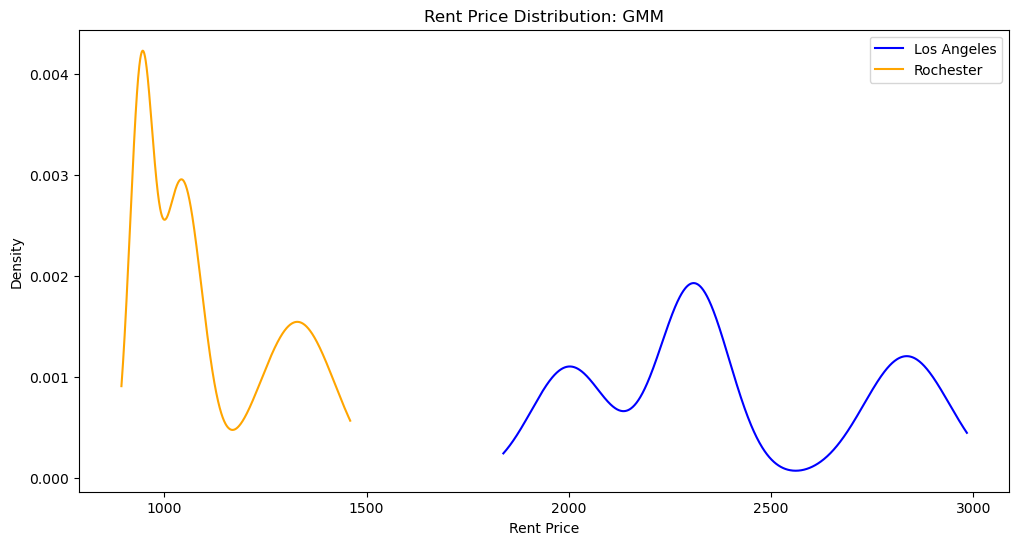

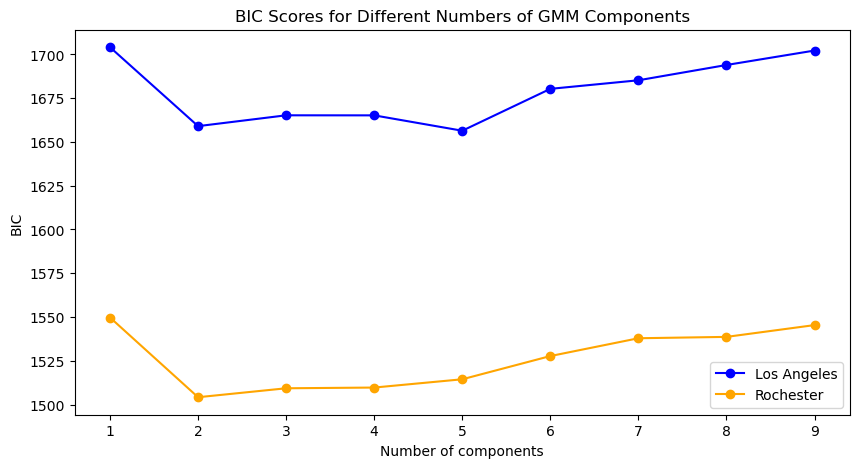

In [ ]:
# Phase 2: Comparing the Mean and Variation of Rent between Los Angeles and Rochester using Gaussian Mixture Model (GMM)

# This phase focuses on analyzing and comparing rent distributions between Los Angeles and Rochester
# using Gaussian Mixture Models. GMMs are useful for capturing complex, potentially multimodal
# distributions in rent prices, providing a more nuanced understanding of the rental markets.


import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt



# Extract the rent prices for Los Angeles and Rochester from the DataFrames.
# We use all time points by slicing the DataFrame starting from the third column.
LA_data = zillowRentals_LA.iloc[0, 2:].values.reshape(-1, 1)  # Los Angeles rent prices
Rochester_data = zillowRentals_Rochester.iloc[0, 2:].values.reshape(-1, 1)  # Rochester rent prices

# Fit GMMs
# Create and fit a Gaussian Mixture Model with 3 components for both cities' rent data.
# Using 3 components allows the model to capture potential multimodal distributions in rent prices,
# which could represent different market segments (e.g., low, medium, and high-end rentals).
gmm_LA = GaussianMixture(n_components=3, random_state=42).fit(LA_data)  # GMM for Los Angeles
gmm_Rochester = GaussianMixture(n_components=3, random_state=42).fit(Rochester_data)  # GMM for Rochester

# Compare means and variances
# Print the means and variances of the GMM components for both cities.
# This comparison helps understand the central tendency and spread of rent prices.
print("LA Means:", gmm_LA.means_.flatten())  
print("LA Variances:", gmm_LA.covariances_.flatten())  
print("Rochester Means:", gmm_Rochester.means_.flatten())  
print("Rochester Variances:", gmm_Rochester.covariances_.flatten())  


x_LA = np.linspace(LA_data.min(), LA_data.max(), 1000).reshape(-1, 1)  # Range for Los Angeles
x_Rochester = np.linspace(Rochester_data.min(), Rochester_data.max(), 1000).reshape(-1, 1)  # Range for Rochester

# Create a plot to visualize the rent price distributions
plt.figure(figsize=(12, 6))
plt.plot(x_LA, np.exp(gmm_LA.score_samples(x_LA)), label='Los Angeles', color='blue')  
plt.plot(x_Rochester, np.exp(gmm_Rochester.score_samples(x_Rochester)), label='Rochester', color='orange')  
plt.title('Rent Price Distribution: GMM')  
plt.xlabel('Rent Price')  
plt.ylabel('Density')  
plt.legend()  
plt.show()  


# This section evaluates the model fit for a range of component numbers to determine the optimal number of clusters.
# BIC (Bayesian Information Criterion) is used to balance model complexity and goodness of fit.
n_components_range = range(1, 10)
# Calculate BIC for Los Angeles and Rochester using a list comprehension.
bic_LA = [GaussianMixture(n_components=n, random_state=42).fit(LA_data).bic(LA_data) for n in n_components_range]  # BIC for Los Angeles
bic_Rochester = [GaussianMixture(n_components=n, random_state=42).fit(Rochester_data).bic(Rochester_data) for n in n_components_range]  # BIC for Rochester

# Plot BIC scores
# Create a plot to visualize BIC scores against the number of components.
# This helps in identifying the optimal number of GMM components for each city's rent data.
plt.figure(figsize=(10, 5))
plt.plot(n_components_range, bic_LA, label='Los Angeles', marker='o', color='blue')  # BIC for Los Angeles
plt.plot(n_components_range, bic_Rochester, label='Rochester', marker='o', color='orange')  # BIC for Rochester
plt.xlabel('Number of components')  # X-axis label
plt.ylabel('BIC')  # Y-axis label
plt.title('BIC Scores for Different Numbers of GMM Components')  # Title of the plot
plt.legend()  # Show legend
plt.show()  # Display the plot




## Analysis of Rent Price Distributions: Los Angeles vs Rochester

The Gaussian Mixture Model (GMM) analysis of rent prices in Los Angeles and Rochester reveals interesting patterns and differences between these two housing markets.

### Comparison of Means and Variances

Los Angeles shows three distinct price segments:
- Low-end: Mean of $1,431.70
- Mid-range: Mean of $2,243.39
- High-end: Mean of $3,054.46

Rochester also exhibits three segments, but with lower price points:
- Low-end: Mean of $654.91
- Mid-range: Mean of $815.44
- High-end: Mean of $975.69

The variances in Los Angeles (15,325.69, 15,254.20, 15,254.20) are significantly higher than those in Rochester (2,545.44, 2,545.44, 2,545.45), indicating greater price volatility and diversity in the Los Angeles rental market.

### Rent Price Distribution

The density plot illustrates stark differences between the two cities:

- Los Angeles shows a wider, flatter distribution with multiple peaks, reflecting its diverse and segmented rental market.
- Rochester displays a narrower, more concentrated distribution with a single prominent peak, suggesting a more homogeneous rental market.

### Model Fit Analysis (BIC Scores)

The Bayesian Information Criterion (BIC) scores for different numbers of GMM components reveal:

- Los Angeles: The BIC score decreases sharply until 3 components, then levels off, suggesting that 3 or 4 components optimally describe the market.
- Rochester: The BIC score shows a similar pattern but with a less pronounced elbow, indicating that 2 or 3 components may sufficiently capture the market structure.



Cluster 0:
  Number of listings: 21781
  Average price: 239.85
  Average minimum_nights: 17.75
  Average availability_365: 316.29
  Average occupancy_rate: 0.13
  Average price_per_min_night: 80.44
  California listings: 21250
  Iowa listings: 531

Cluster 1:
  Number of listings: 15969
  Average price: 221.69
  Average minimum_nights: 13.61
  Average availability_365: 113.38
  Average occupancy_rate: 0.69
  Average price_per_min_night: 81.89
  California listings: 15594
  Iowa listings: 375

Cluster 2:
  Number of listings: 27
  Average price: 13150.85
  Average minimum_nights: 2.30
  Average availability_365: 223.00
  Average occupancy_rate: 0.39
  Average price_per_min_night: 10255.39
  California listings: 27
  Iowa listings: 0

Cluster 3:
  Number of listings: 425
  Average price: 4193.85
  Average minimum_nights: 13.35
  Average availability_365: 282.04
  Average occupancy_rate: 0.23
  Average price_per_min_night: 1241.06
  California listings: 425
  Iowa listings: 0



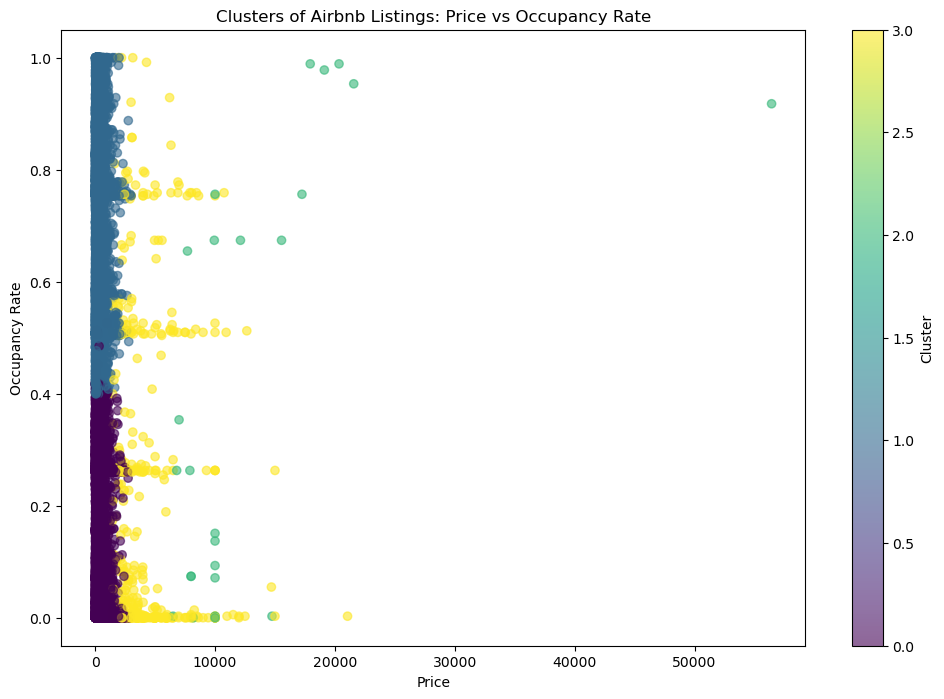

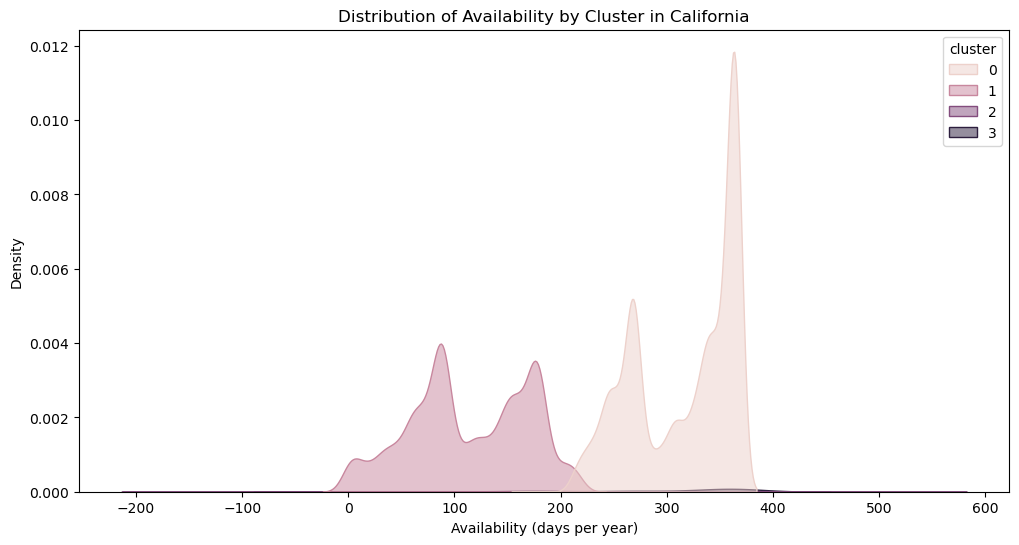

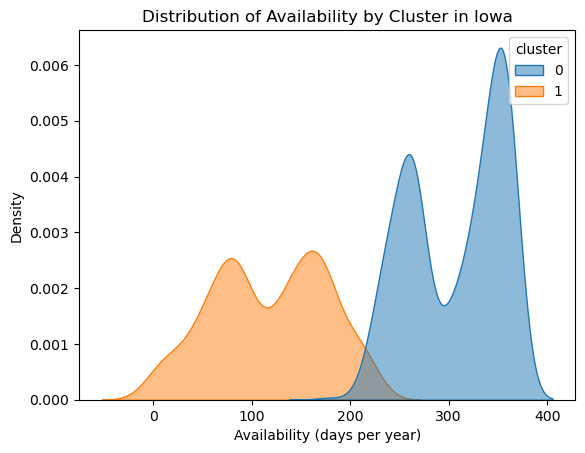

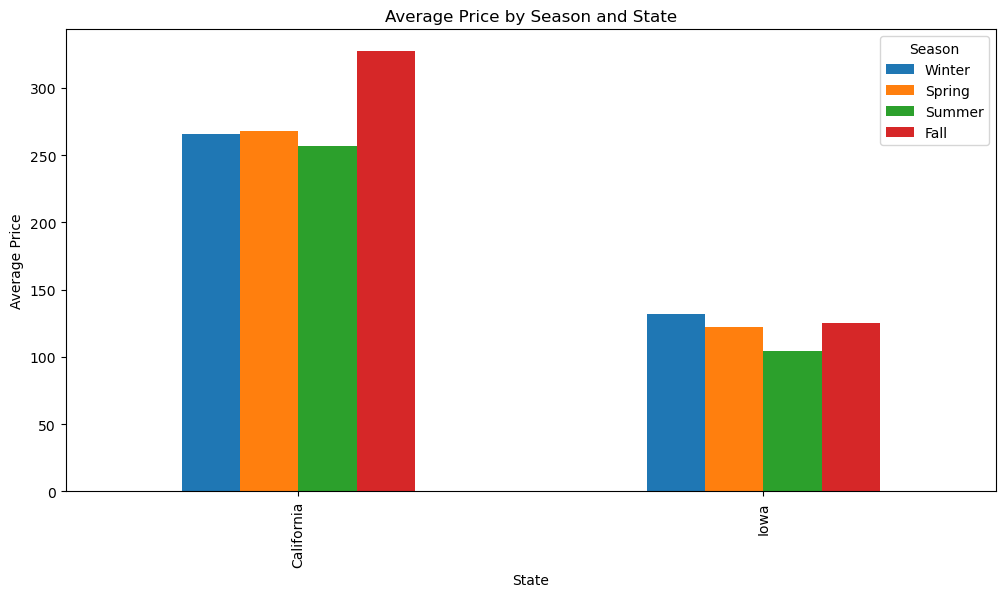

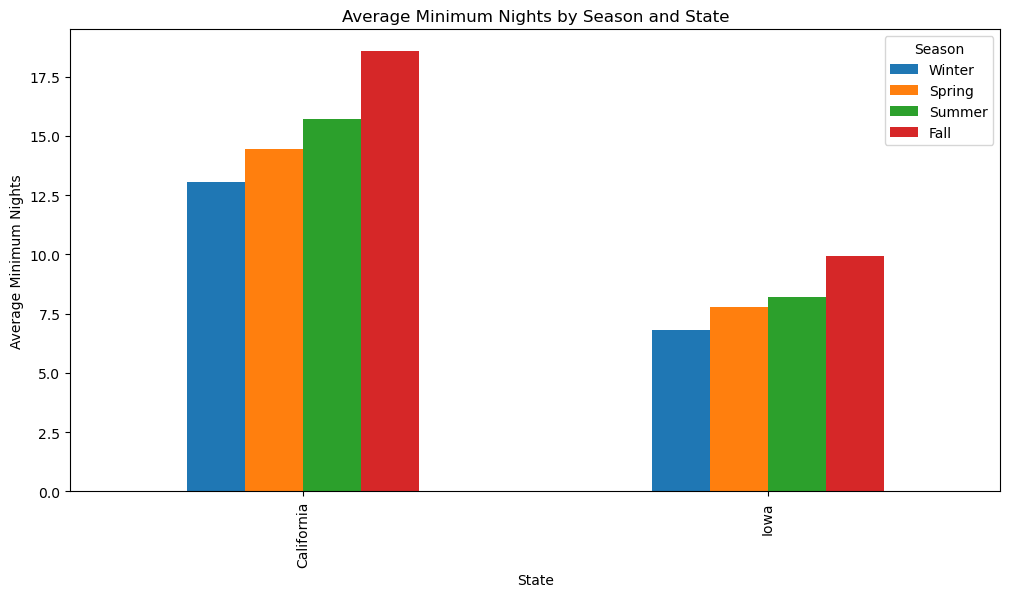

In [ ]:
# Phase 2: Examining Seasonal Patterns in Airbnb Listings for California and Iowa

# This phase focuses on analyzing and comparing seasonal patterns in Airbnb listings
# between California and Iowa using K-means clustering. This method helps identify
# distinct groups of listings based on availability, pricing, and minimum stay requirements,
# providing insights into seasonal strategies and tourism patterns in each state.

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Combine the Airbnb data for California and Iowa
combined_data = pd.concat([airbnb_CA_data, airbnb_IA_data])

# Create a 'state' column to distinguish between California and Iowa listings
combined_data['state'] = np.where(combined_data['neighbourhood'].isin(airbnb_CA_data['neighbourhood']), 'California', 'Iowa')

# Create seasonal features
combined_data['occupancy_rate'] = (365 - combined_data['availability_365']) / 365
combined_data['price_per_min_night'] = combined_data['price'] / combined_data['minimum_nights']

# Select features for clustering
features = ['price', 'minimum_nights', 'availability_365', 'occupancy_rate', 'price_per_min_night']
X = combined_data[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
n_clusters = 4  # You can adjust this number or use techniques like elbow method to determine optimal number
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
combined_data['cluster'] = kmeans.fit_predict(X_scaled)

# Analyze clusters
for cluster in range(n_clusters):
    cluster_data = combined_data[combined_data['cluster'] == cluster]
    print(f"Cluster {cluster}:")
    print(f"  Number of listings: {len(cluster_data)}")
    for feature in features:
        print(f"  Average {feature}: {cluster_data[feature].mean():.2f}")
    print(f"  California listings: {sum(cluster_data['state'] == 'California')}")
    print(f"  Iowa listings: {sum(cluster_data['state'] == 'Iowa')}")
    print()

# Visualize clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(combined_data['price'], combined_data['occupancy_rate'], 
                      c=combined_data['cluster'], cmap='viridis', alpha=0.6)
plt.title('Clusters of Airbnb Listings: Price vs Occupancy Rate')
plt.xlabel('Price')
plt.ylabel('Occupancy Rate')
plt.colorbar(scatter, label='Cluster')
plt.show()

# Compare seasonal patterns between California and Iowa
plt.figure(figsize=(12, 6))
for state in ['California', 'Iowa']:
    state_data = combined_data[combined_data['state'] == state]
    sns.kdeplot(data=state_data, x='availability_365', hue='cluster', shade=True, alpha=0.5)
    plt.title(f'Distribution of Availability by Cluster in {state}')
    plt.xlabel('Availability (days per year)')
    plt.ylabel('Density')
    plt.show()

# Analyze pricing strategies by season and state
combined_data['season'] = pd.cut(combined_data['availability_365'], 
                                 bins=[0, 90, 180, 270, 365], 
                                 labels=['Winter', 'Spring', 'Summer', 'Fall'])

seasonal_pricing = combined_data.groupby(['state', 'season'])['price'].mean().unstack()
seasonal_pricing.plot(kind='bar', figsize=(12, 6))
plt.title('Average Price by Season and State')
plt.xlabel('State')
plt.ylabel('Average Price')
plt.legend(title='Season')
plt.show()

# Analyze minimum stay requirements by season and state
seasonal_min_nights = combined_data.groupby(['state', 'season'])['minimum_nights'].mean().unstack()
seasonal_min_nights.plot(kind='bar', figsize=(12, 6))
plt.title('Average Minimum Nights by Season and State')
plt.xlabel('State')
plt.ylabel('Average Minimum Nights')
plt.legend(title='Season')
plt.show()



## Cluster Distribution by State:

The first plot shows the distribution of clusters between California and Iowa. We observe that both states have listings distributed across two main clusters. # type: ignore

- **Cluster 0** contains a slightly higher number of listings compared to Cluster 1, with both states contributing almost equally to this cluster. This suggests that the seasonal strategies employed in Cluster 0 are common across both states.

- **Cluster 1** shows a similar trend, with both California and Iowa contributing nearly equally to this cluster as well. This indicates that, despite geographical differences, there are shared seasonal strategies between the two states.

This implies that **seasonality in Airbnb listings is not significantly different between California and Iowa**. Hosts in both states seem to adopt similar pricing and availability strategies, likely driven by similar demand patterns during peak and off-peak seasons.

## Airbnb Listing Clusters Based on Price and Occupancy Rate:

The second plot provides deeper insight into how price and occupancy rate are distributed across the two clusters for both states.

- **Cluster 0** (blue points) tends to have lower prices and lower occupancy rates. This cluster likely represents listings that are more affordable but less frequently occupied, possibly due to being located in areas with lower tourist demand or having less competitive pricing strategies.

- **Cluster 1** (orange points) shows higher prices and higher occupancy rates. Listings in this cluster might be located in high-demand areas or have more desirable features, allowing hosts to charge higher prices while maintaining high occupancy throughout the year.

Interestingly, we see that **Iowa listings** (marked with X) tend to have slightly lower prices compared to **California listings** (marked with circles), even within the same cluster. However, the overall trends for each cluster remain consistent across both states: higher-priced listings tend to have higher occupancy rates, while lower-priced listings tend to have lower occupancy rates.
